In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("/home/jay/Elevate_lab_tasks/Datasets/Titanic-Dataset_task_1.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# data validation

# dataframe for datatype
data_type = pd.DataFrame(data.dtypes,columns=['Data_type'])

# dataframe for missing values
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2),columns = ['Missing_percentage'])

sample_data = pd.DataFrame(data.head(2).T)

# concatinating above dataframe
data_concat = pd.concat([data_type,data_missing,sample_data],axis=1)

data_concat.rename(columns = {0: 'Columns_1',
                              1: 'Columns_2'}, inplace = True)
data_concat

,Data_type,Missing_percentage,Columns_1,Columns_2
PassengerId,int64,0.00,1,2
Survived,int64,0.00,0,1
Pclass,int64,0.00,3,1
Name,object,0.00,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,object,0.00,male,female
Age,float64,19.87,22.0,38.0
SibSp,int64,0.00,1,1
Parch,int64,0.00,0,0
Ticket,object,0.00,A/5 21171,PC 17599
Fare,float64,0.00,7.25,71.2833


In [9]:
# removing passengerid
data=data.iloc[:,1:]

In [10]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# data duplicates
print(f'The data has {data[data.duplicated()].shape[0]} duplicate rows.')

The data has 0 duplicate rows.


In [13]:
num,obj=0,0

for cols in data.columns:
    if data[cols].dtype=='O':
        obj+=1
    else:
        num+=1

print(f'The data has {num} numerical and {obj} categorical features.')

The data has 6 numerical and 5 categorical features.


In [15]:
# analysing the target/dependent column
round(data['Survived'].value_counts(normalize=True)*100 , 2)

Survived
0    61.62
1    38.38
Name: proportion, dtype: float64

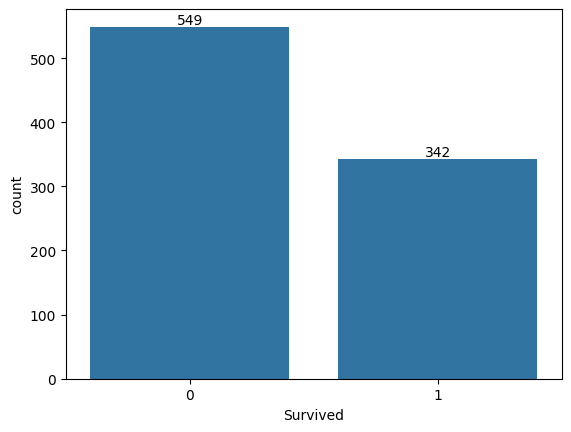

In [19]:
# Plotting graph 
ax=sns.countplot(x=data['Survived'],order=data['Survived'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

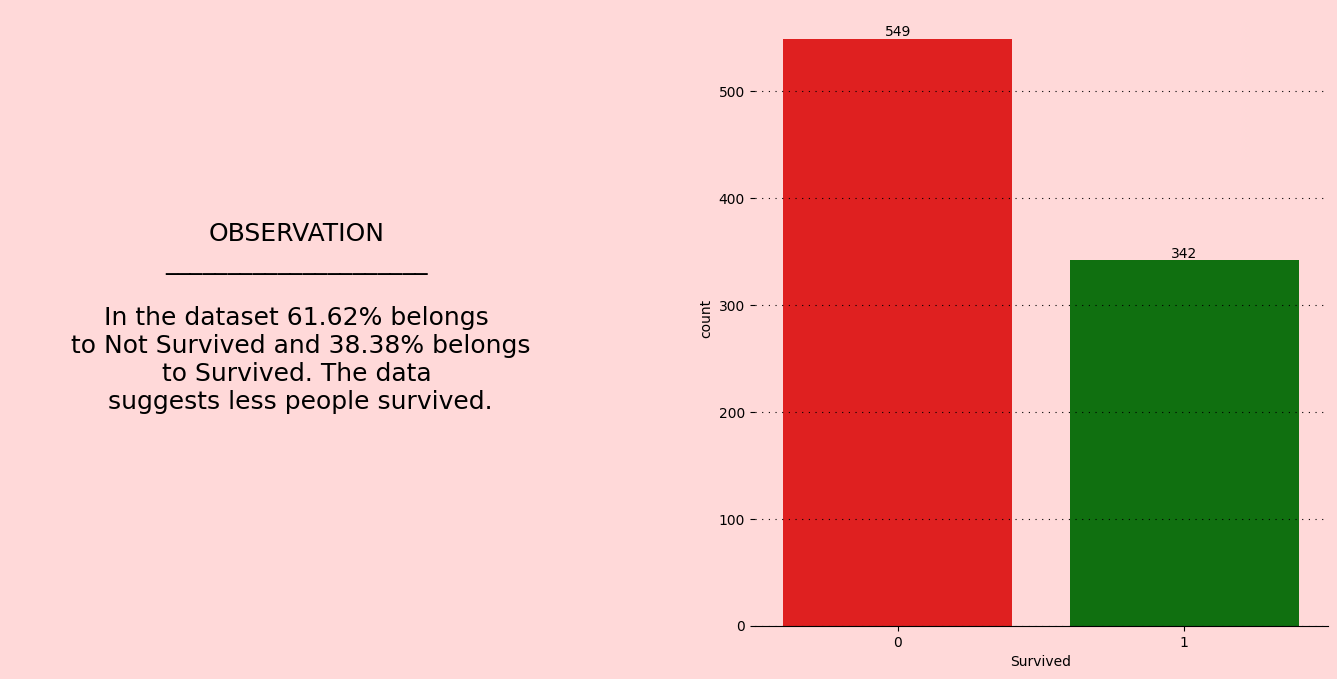

In [25]:
# Analysing the target column

# creating a plot structure
fig = plt.figure(figsize=(17, 8))
spec = fig.add_gridspec(1, 2)
spec.update(wspace=0.3, hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# adding color
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Plotting the graph for attrition
ax = sns.countplot(x=data['Survived'],
                   order=data['Survived'].value_counts().index,
                   palette=['red','green'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
sec_2.grid(color='black', axis='y', ls=':', dashes=(1,5))

# Narrating the observation
max, min = round(data['Survived'].value_counts(normalize=True)*100, 2)
sec_1.text(0.5, 0.5, f'OBSERVATION\n_____________________\n\nIn the dataset {max}% belongs\n to Not Survived \
and {min}% belongs\n to Survived. The data \n suggests less people survived.', va='center', ha='center', size=18)

# Removing the spines and axis
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for position in ['left', 'right', 'top', 'bottom']:
    for section in [sec_1, sec_2]:
        if position == 'bottom' and section == sec_2:
            continue
        else:
            section.spines[position].set_visible(False)

<Axes: >

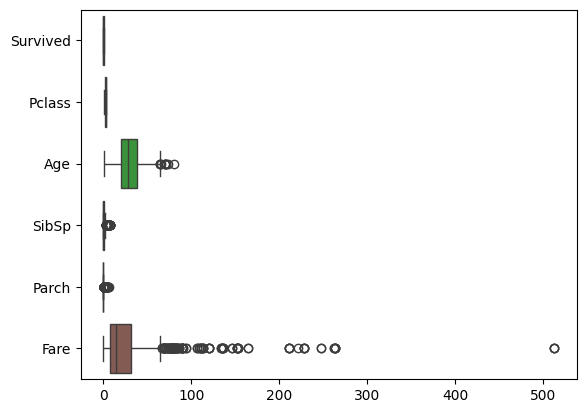

In [29]:
# analysing outliers using boxplot

sns.boxplot(data,orient='h')


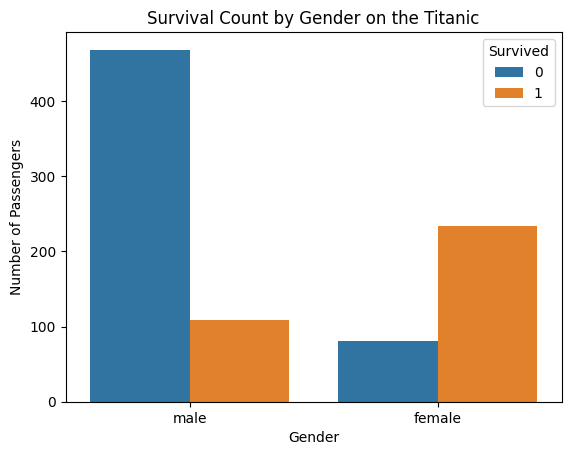

In [42]:
# Creating a countplot to show the number of male and female survivors and non-survivors
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title('Survival Count by Gender on the Titanic')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

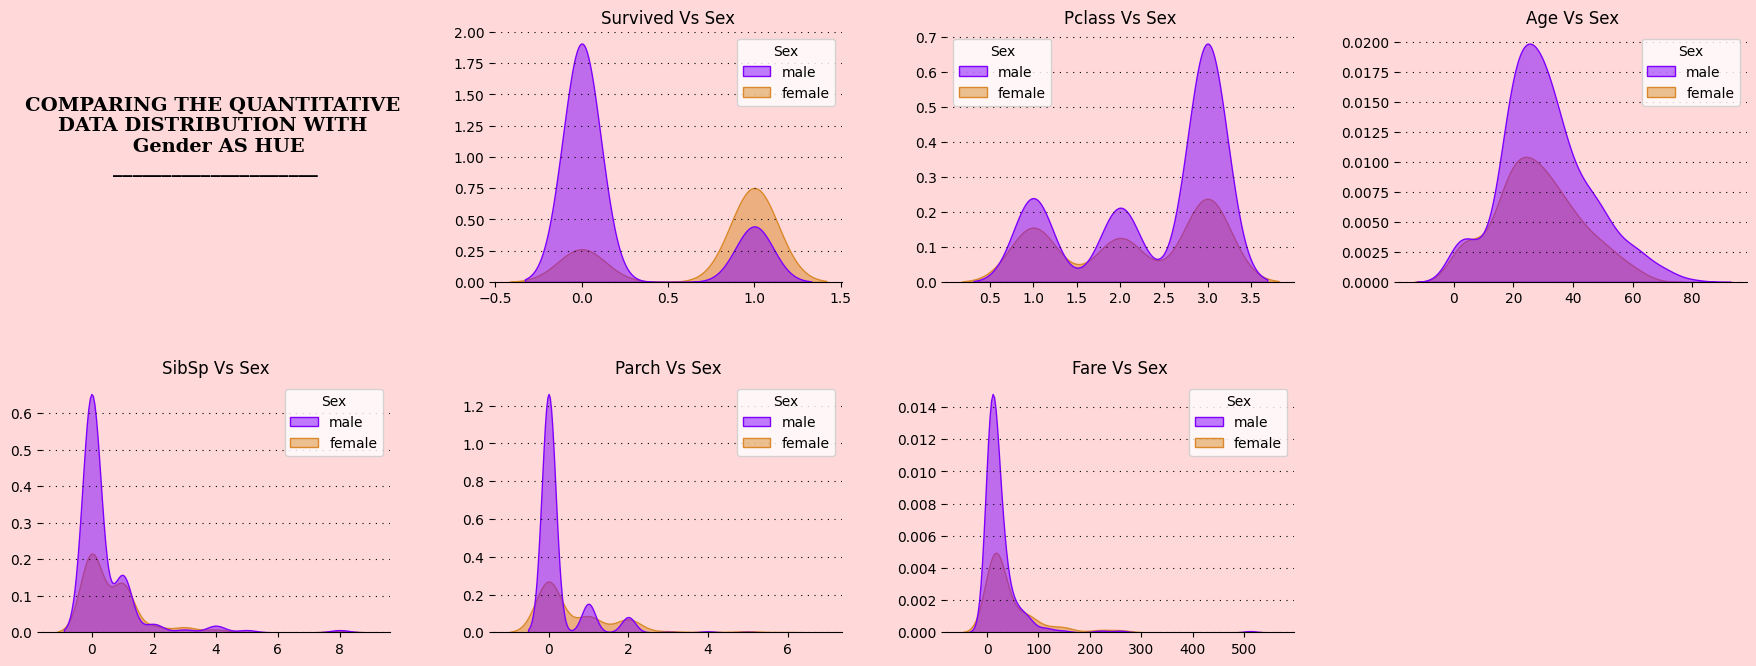

In [31]:
# Comparing the proportion of distribution of targets across numerical classes

# Creating the plot structure
fig = plt.figure(figsize=(22, 26))
spec = fig.add_gridspec(6, 4)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])


# adding color preference
bg_color = '#ffd9d9'
for section in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07]:
    section.set_facecolor(bg_color)

# plotting the graph
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07]

cnt = 0
for feature in data.columns:
    if data[feature].dtype != 'O':
        sns.kdeplot(data, x=feature, hue='Sex',
                    fill=True, palette=["#8000ff","#da8829"],
                    alpha=0.5, ax=sec[cnt])
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature+' Vs Sex')
        sec[cnt].grid(color='#000000', ls=':', axis='y', dashes=(1,5))

        for position in ['left', 'right', 'top']:
            sec[cnt].spines[position].set_visible(False)

        cnt += 1


# Creating plot structure title
sec_01.text(0.5,0.5,'COMPARING THE QUANTITATIVE \nDATA DISTRIBUTION WITH \n GENDER AS HUE\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)

# Removing axis and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)


##  OBSERVATION 

    1.For the quantitative variables, the distribution of gender 'female' folows the same pattern of distribution
    for gender 'male' with less density.
   
    2.Mostly the number of women who survived were more then number of men who survived.
   
    3.The men who survived where mostly between 20 to 40 years of age, same for women as well.

    4.SibSp score for men is way higher than women,same for the Parch score as well indicating men who travelled with family had more chances of survival.

    5.The Pclass of men is higher than women which can also be seen by higher fares given by women.
    

All this observations suggest that even men between 20-40 years of age who had higher Pclass and travelled with family still had less survival rate than women


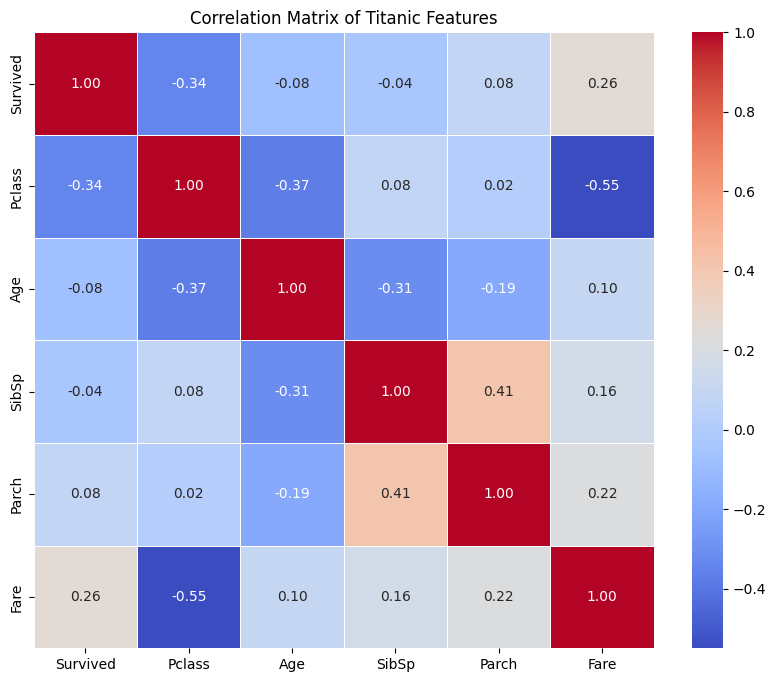

In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the correlation matrix for numerical features
corr = data.corr(numeric_only=True)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Titanic Features')
plt.show()


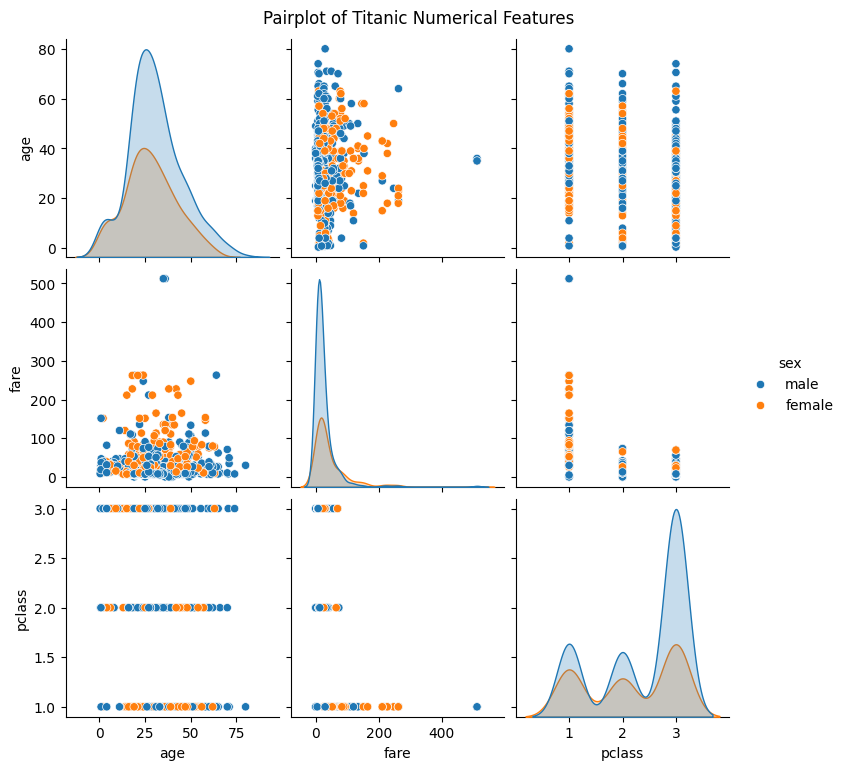

In [45]:
# Create a pairplot, colored by 'sex' for added context
sns.pairplot(df, vars=['age', 'fare', 'pclass'], hue='sex', diag_kind='kde')
plt.suptitle('Pairplot of Titanic Numerical Features', y=1.02)
plt.show()
